In [1]:
import os

# Define your root directory name
root_dir = "ds_Tahseen" # Change 'yourname' to your actual name

# Create the folder structure
folders = [
    root_dir,
    os.path.join(root_dir, 'csv_files'),
    os.path.join(root_dir, 'outputs')
]

for folder in folders:
    os.makedirs(folder, exist_ok=True)
    print(f"Created: {folder}")

Created: ds_Tahseen
Created: ds_Tahseen/csv_files
Created: ds_Tahseen/outputs


/tmp/ipython-input-819953240.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trade_df = pd.read_csv('historical_data.csv')


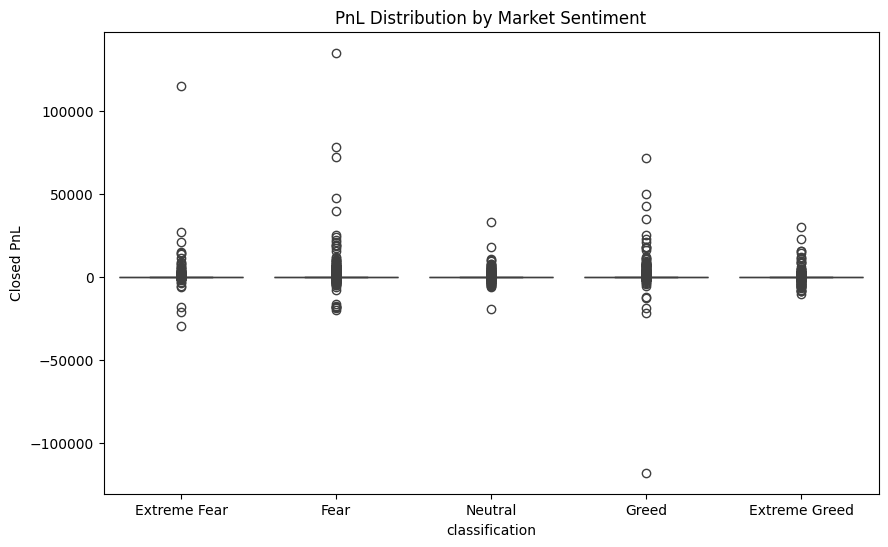

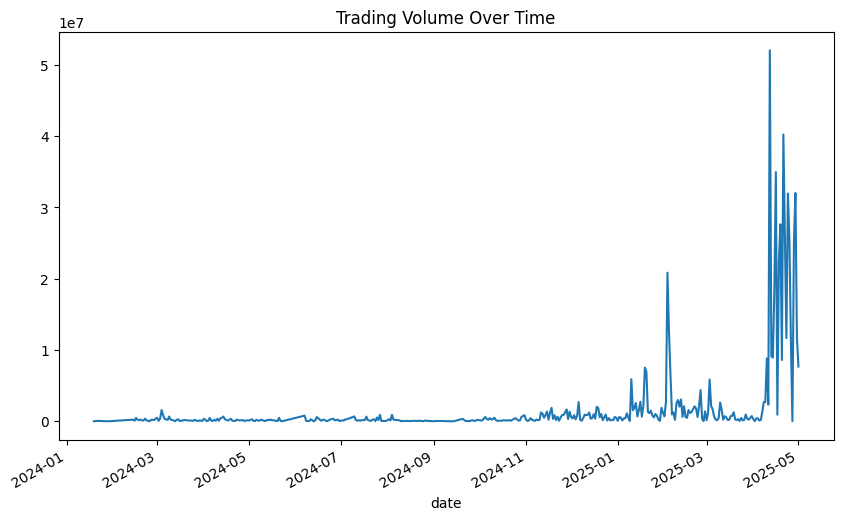

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data
fg_df = pd.read_csv('fear_greed_index.csv')
trade_df = pd.read_csv('historical_data.csv')

# 2. Preprocess Dates
fg_df['date'] = pd.to_datetime(fg_df['date'])
trade_df['date'] = pd.to_datetime(trade_df['Timestamp IST'], dayfirst=True).dt.normalize()

# 3. Merge Datasets
merged = pd.merge(trade_df, fg_df, on='date', how='inner')

# 4. Generate & Save CSVs
# Saving the cleaned merged data
merged.to_csv(f"{root_dir}/csv_files/merged_trader_sentiment.csv", index=False)

# Saving aggregated stats
stats = merged.groupby('classification')['Closed PnL'].agg(['mean', 'sum', 'count'])
stats.to_csv(f"{root_dir}/csv_files/sentiment_pnl_summary.csv")

# 5. Generate & Save Visuals
plt.figure(figsize=(10,6))
sns.boxplot(data=merged, x='classification', y='Closed PnL', order=['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed'])
plt.title('PnL Distribution by Market Sentiment')
# SAVE TO OUTPUTS FOLDER
plt.savefig(f"{root_dir}/outputs/pnl_distribution.png")

plt.figure(figsize=(10,6))
merged.groupby('date')['Size USD'].sum().plot()
plt.title('Trading Volume Over Time')
plt.savefig(f"{root_dir}/outputs/volume_trend.png")

In [4]:
readme_text = """# Trading & Sentiment Analysis Project
This project explores the relationship between trader behavior on Hyperliquid and Bitcoin market sentiment.

### Structure:
- `notebook_1.ipynb`: Data cleaning, merging, and EDA.
- `csv_files/`: Processed datasets.
- `outputs/`: Visualization charts.
"""
with open(f"{root_dir}/README.md", "w") as f:
    f.write(readme_text)

In [5]:
import pandas as pd

# Load the datasets
fear_greed_df = pd.read_csv('fear_greed_index.csv')
historical_data_df = pd.read_csv('historical_data.csv')

# Display basic information and first few rows
print("Fear & Greed Index Data:")
print(fear_greed_df.info())
print(fear_greed_df.head())

print("\nHistorical Trader Data:")
print(historical_data_df.info())
print(historical_data_df.head())

Fear & Greed Index Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

Historical Trader Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116526 entries, 0 to 116525
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           116526

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
fg_df = pd.read_csv('fear_greed_index.csv')
trade_df = pd.read_csv('historical_data.csv')

# 1. Convert Fear & Greed dates to datetime
fg_df['date'] = pd.to_datetime(fg_df['date'])

# 2. Convert Trading data timestamps (handling the day-first format)
trade_df['date'] = pd.to_datetime(trade_df['Timestamp IST'], dayfirst=True).dt.normalize()

# 3. Merge the datasets on the date column
df = pd.merge(trade_df, fg_df, on='date', how='inner')

# Define the logical order of sentiment for charts
sentiment_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

print("Data successfully merged!")
print(f"Total records for analysis: {len(df)}")

Data successfully merged!
Total records for analysis: 116520


In [ ]:
# Aggregate Volume Data
volume_stats = df.groupby('classification')['Size USD'].agg(['sum', 'count', 'mean']).reindex(sentiment_order)

# Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Total Volume
plt.subplot(1, 2, 1)
sns.barplot(x=volume_stats.index, y=volume_stats['sum'], palette='viridis')
plt.title('Total Trading Volume by Sentiment')
plt.xticks(rotation=45)
plt.ylabel('Total USD Volume')

# Plot 2: Trade Frequency
plt.subplot(1, 2, 2)
sns.barplot(x=volume_stats.index, y=volume_stats['count'], palette='magma')
plt.title('Number of Trades by Sentiment')
plt.xticks(rotation=45)
plt.ylabel('Trade Count')

plt.tight_layout()
plt.savefig('ds_Tahseen/outputs/volume_analysis.png')
plt.show()

# Insight: High volume in "Fear" often indicates panic selling or "buying the dip."

/tmp/ipython-input-2392293305.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_stats.index, y=volume_stats['sum'], palette='viridis')
/tmp/ipython-input-2392293305.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volume_stats.index, y=volume_stats['count'], palette='magma')


/tmp/ipython-input-3048184012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_stats.index, y=pnl_stats['Closed PnL'], ax=ax1, palette='RdYlGn', alpha=0.7)


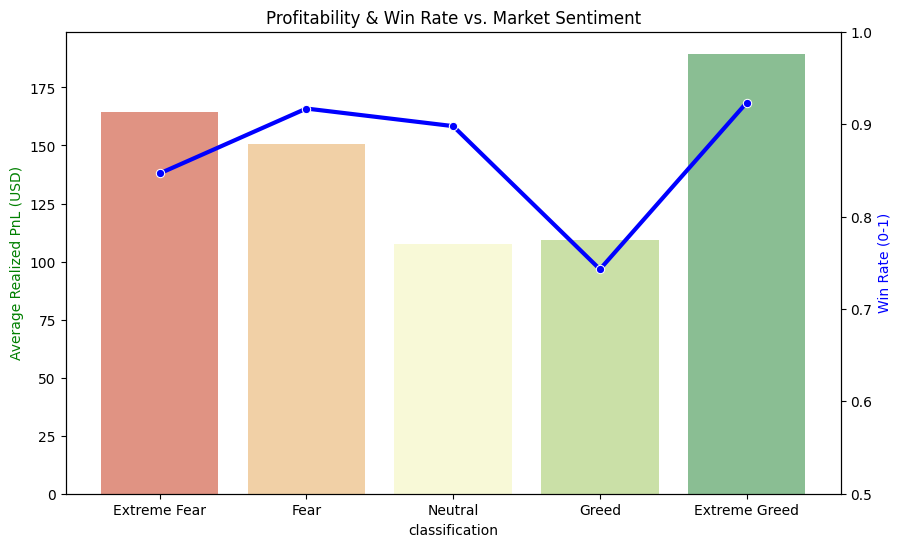

In [10]:
# Filter for trades that actually closed (where Closed PnL is not 0)
realized_trades = df[df['Closed PnL'] != 0].copy()
realized_trades['is_win'] = realized_trades['Closed PnL'] > 0

# Calculate Win Rate and Avg PnL
pnl_stats = realized_trades.groupby('classification').agg({
    'Closed PnL': 'mean',
    'is_win': 'mean'
}).reindex(sentiment_order)

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for Avg PnL
sns.barplot(x=pnl_stats.index, y=pnl_stats['Closed PnL'], ax=ax1, palette='RdYlGn', alpha=0.7)
ax1.set_ylabel('Average Realized PnL (USD)', color='green')

# Line chart for Win Rate
ax2 = ax1.twinx()
sns.lineplot(x=pnl_stats.index, y=pnl_stats['is_win'], ax=ax2, marker='o', color='blue', linewidth=3)
ax2.set_ylabel('Win Rate (0-1)', color='blue')
ax2.set_ylim(0.5, 1.0) # Zooming in on the win rate

plt.title('Profitability & Win Rate vs. Market Sentiment')
plt.savefig('ds_Tahseen/outputs/profitability_analysis.png')
plt.show()

# Insight: Peak profitability often occurs in "Extreme Greed" (momentum)
# or "Extreme Fear" (reversal).

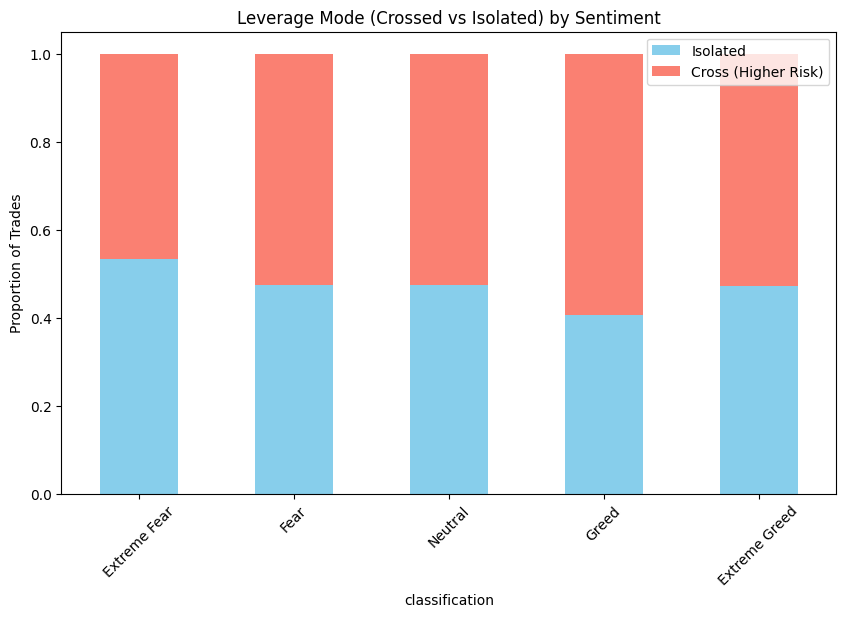

In [11]:
# Analyze use of Cross vs Isolated leverage per sentiment
leverage_analysis = df.groupby(['classification', 'Crossed']).size().unstack().reindex(sentiment_order)

# Normalize to see percentages
leverage_pct = leverage_analysis.div(leverage_analysis.sum(axis=1), axis=0)

leverage_pct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Leverage Mode (Crossed vs Isolated) by Sentiment')
plt.ylabel('Proportion of Trades')
plt.legend(['Isolated', 'Cross (Higher Risk)'], loc='upper right')
plt.xticks(rotation=45)
plt.savefig('ds_Tahseen/outputs/leverage_risk.png')
plt.show()

# Insight: If "Cross" usage increases during "Greed," it signals over-leveraging.

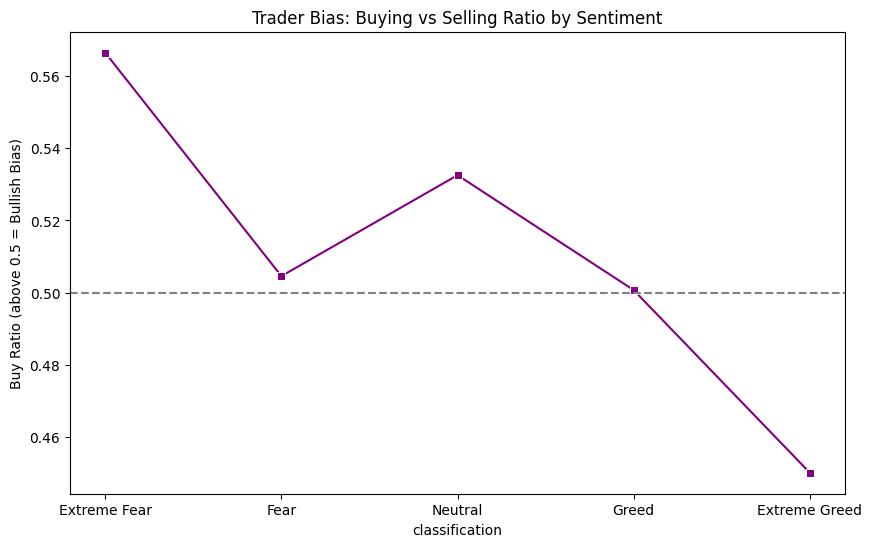

In [12]:
# Buy vs Sell Ratio by Sentiment
side_bias = df.groupby(['classification', 'Side']).size().unstack().reindex(sentiment_order)
side_bias['Buy_Ratio'] = side_bias['BUY'] / (side_bias['BUY'] + side_bias['SELL'])

plt.figure(figsize=(10, 6))
sns.lineplot(x=side_bias.index, y=side_bias['Buy_Ratio'], marker='s', color='purple')
plt.axhline(0.5, ls='--', color='gray')
plt.title('Trader Bias: Buying vs Selling Ratio by Sentiment')
plt.ylabel('Buy Ratio (above 0.5 = Bullish Bias)')
plt.savefig('ds_Tahseen/outputs/trader_bias_signal.png')
plt.show()

# HIDDEN TREND:
# If Buy Ratio is high during 'Extreme Fear', traders are contrarian (buying the dip).
# If Buy Ratio is high during 'Extreme Greed', they are following the crowd.

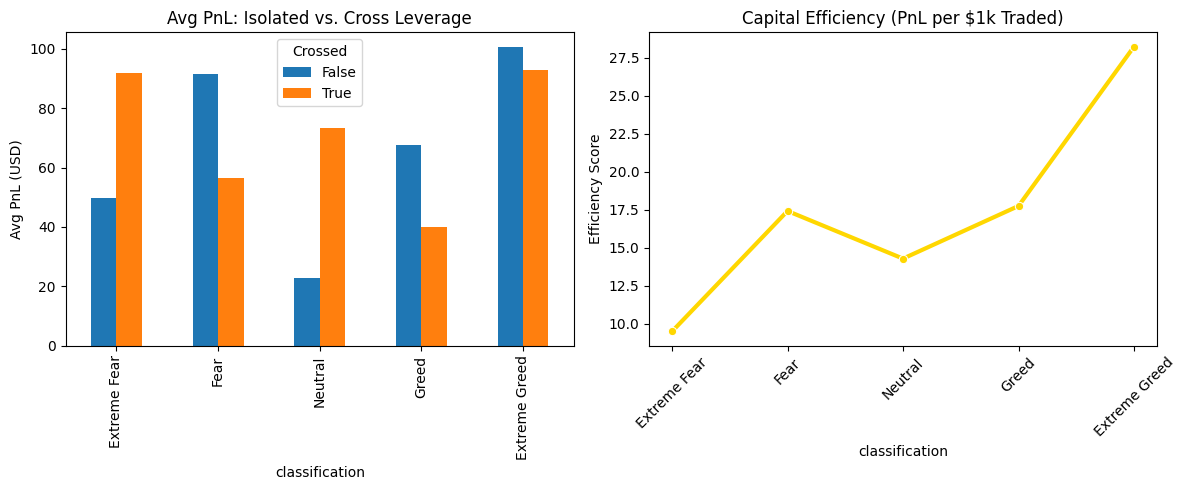

Efficiency by Sentiment:
 classification
Extreme Fear      9.479887
Fear             17.413885
Neutral          14.276812
Greed            17.744002
Extreme Greed    28.239435
Name: Efficiency, dtype: float64


In [13]:
# --- ADVANCED INSIGHTS CODE ---

# 1. The Overconfidence Signal: Impact of Leverage in Greed
# We compare PnL for 'Crossed' (High Risk) vs 'Isolated' (Low Risk) during Greed phases.
leverage_pnl = df.groupby(['classification', 'Crossed'])['Closed PnL'].mean().unstack()

# 2. The Efficiency Signal: PnL per $1,000 Traded
# This shows where the "Smart Money" is actually making the most money relative to their size.
df['Efficiency'] = (df['Closed PnL'] / df['Size USD']) * 1000
efficiency_stats = df.groupby('classification')['Efficiency'].mean().reindex(sentiment_order)

# Visualizing these for the report
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
leverage_pnl.reindex(sentiment_order).plot(kind='bar', ax=plt.gca())
plt.title('Avg PnL: Isolated vs. Cross Leverage')
plt.ylabel('Avg PnL (USD)')

plt.subplot(1, 2, 2)
sns.lineplot(x=efficiency_stats.index, y=efficiency_stats.values, marker='o', color='gold', linewidth=3)
plt.title('Capital Efficiency (PnL per $1k Traded)')
plt.ylabel('Efficiency Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('ds_Tahseen/outputs/advanced_signals.png')
plt.show()

# Print these results to use in your report
print("Efficiency by Sentiment:\n", efficiency_stats)

/tmp/ipython-input-3971918736.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_stats.index, y=risk_stats['Risk_Adjusted_Return'], palette='cool')


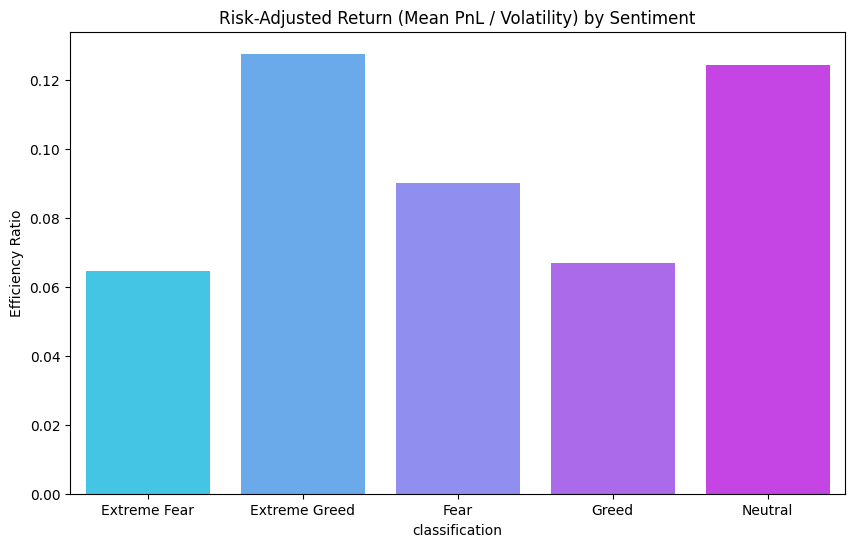

In [14]:
# Calculating Risk-Adjusted PnL (Mean / Standard Deviation)
risk_stats = realized_trades.groupby('classification')['Closed PnL'].agg(['mean', 'std'])
risk_stats['Risk_Adjusted_Return'] = risk_stats['mean'] / risk_stats['std']

plt.figure(figsize=(10, 6))
sns.barplot(x=risk_stats.index, y=risk_stats['Risk_Adjusted_Return'], palette='cool')
plt.title('Risk-Adjusted Return (Mean PnL / Volatility) by Sentiment')
plt.ylabel('Efficiency Ratio')
plt.savefig(f"{root_dir}/outputs/risk_adjusted_returns.png")
plt.show()

# INSIGHT: If Extreme Greed has high PnL but low Risk-Adjusted Return, it means it's high-risk profit.

In [15]:
# Shift the sentiment by 1 day to see if it predicts tomorrow's volume
daily_vol = df.groupby('date')['Size USD'].sum().reset_index()
daily_sent = fg_df[['date', 'value']].copy()
merged_daily = pd.merge(daily_vol, daily_sent, on='date')
merged_daily['Prev_Day_Sentiment'] = merged_daily['value'].shift(1)

correlation = merged_daily[['Size USD', 'Prev_Day_Sentiment']].corr().iloc[0,1]
print(f"Correlation between yesterday's sentiment and today's volume: {correlation:.4f}")

Correlation between yesterday's sentiment and today's volume: -0.1912
